In [1]:
#!pip install sqlalchemy pandas mlxtend seaborn
%load_ext autoreload
%autoreload 2

# Verbimallid apriori

## Ülesande kirjeldus Svenilt
1. Trandaktsioonide sisu filtreerimine
    - Kadrit ei huvita vebile alluvad kirjavahemärgid
    - Kadrit ei huvita verbile alluv kõrvallause.
      (ma sõin putru ja vaatasin televiisorit) 
      Vastav alampuu on spetsiifilise deprel nimega (sinu näites cc ja veel ka conj)
      Kontrolli seda ise vaadates erinevaid liitlauseid läbi. Kadri saab sind selles osas aidata
   - Vaata et transaktsiooni ei jääks ühendverbi liite osa (kirjutas maha --> maha), sest see on müra

2. Transaktsiooni item-ite moodustamine
    - Kadri meelest pole ainuse ja mitmuse eristamine oluline välja arvatud subject/objekt tippudes
    - Item peaks olema deprel + form. 
      Sul on mingit tipud deprel + form1, form2 kuidas see tekkida sai
      Näiteks {'deprel': 'nsubj', 'feats': 'com,nom,sg'} -- kas see on mitmene morf analüüs? Kui jah, kas sa saad siis com | nom kasutada
- sõnavormide lisamine item-i sisse. 
Võiks olla mingi lävend, et kui sõnavorm on antud deprel-i all sagedamini kui 20% siis jääb see ka alles
magas und --> und on obj ja peaaegfu ainus võimalik obj verbiga magama


3. Itemset mining. Sellele on vaja peale visata almost-closed set filter
 
Sa hakkad tulemusi vaatama kõige pikematest alamhulkadest


Olgu sul pikk alamhulk X sagedusega t_X ja olgu Y selle ühe itemiga vähem hulk st Y + {a} = X 
Siis tuleb hulk Y kustutada kui selle sagedus t_y >= t_x - delta, kus delta on mingi lävend
Standard juhul on delta=0, aga meie rakenduses võiks delta olla 2-5% kui sa mõõdad sagedust protsentides


Kui sa nii, kontrollid elementide arvu järgi tagurpidiselt järjestatud hulki, saad kompaktse esituse, mida meil vaja on


4. Tulemuse esitus


Graafiline heatmap, Pane allesjäänud hulgad 0/1 kodeeringus heatmapile


Järjestus peaks olema SUB, OBJ, OBL1, ...OBLx, muud
Kadri annab täpse järjestuse


## TODO!

* Täpsustada ignoreeritavate deprelide nimekirja. Hetkel: ["cc", "conj", "punct", "mark", "aux"] ja compound:prt kui compound=None
  
*  Järjestada liikmed Kadri etteantud järjekorras (kas sõnad näidetes tuleb järestada ka vastavalt?).
*  Kaaluda kirjavahemärkide jne müra eemaldamist andmestikust. 
*  Parandada apriori tulemuse filtreerimine protsendi järgi


# Algseadistamine

In [2]:

from V30Apriori import V30
import pandas as pd
pd.set_option('display.max_colwidth', 0)

v30 = V30(
    "/Users/rabauti/repos/tu/estnltk/syntax_experiments/syntax_experiments__subcat/v30_verb_transactions/v30_koondkorpus_sentences_indexed.db",
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )

## armastama

************************************************ armastama   ************************************************
Ridu analüüsimiseks: 19229
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
3,0.654844,"((OBJ, part, ))",issit,False,,1
1,0.607884,"((NSUBJ, nom, ))",pere,False,,1
10,0.374382,"((NSUBJ, nom, ), (OBJ, part, ))",roman irinat,False,,2
0,0.305892,"((ADVMOD, , ))",aga,False,,1
5,0.233241,"((XCOMP, , ))",kasutada,False,,1
8,0.202143,"((OBJ, part, ), (ADVMOD, , ))",ainult ülemust rohkem,False,,2
6,0.191014,"((NSUBJ, nom, ), (ADVMOD, , ))",nad tõeliselt,False,,2
11,0.167871,"((NSUBJ, nom, ), (XCOMP, , ))",jass põõnata,False,,2
2,0.166207,"((NSUBJ, nom, ma))",ma,True,(row 12) delta: abs(0.1400 - 0.1662) < 0.03 %: (0.1662-0.1400)/0.1400*100<50,1
12,0.140049,"((NSUBJ, nom, ma), (OBJ, part, ))",ma magusat,False,,2


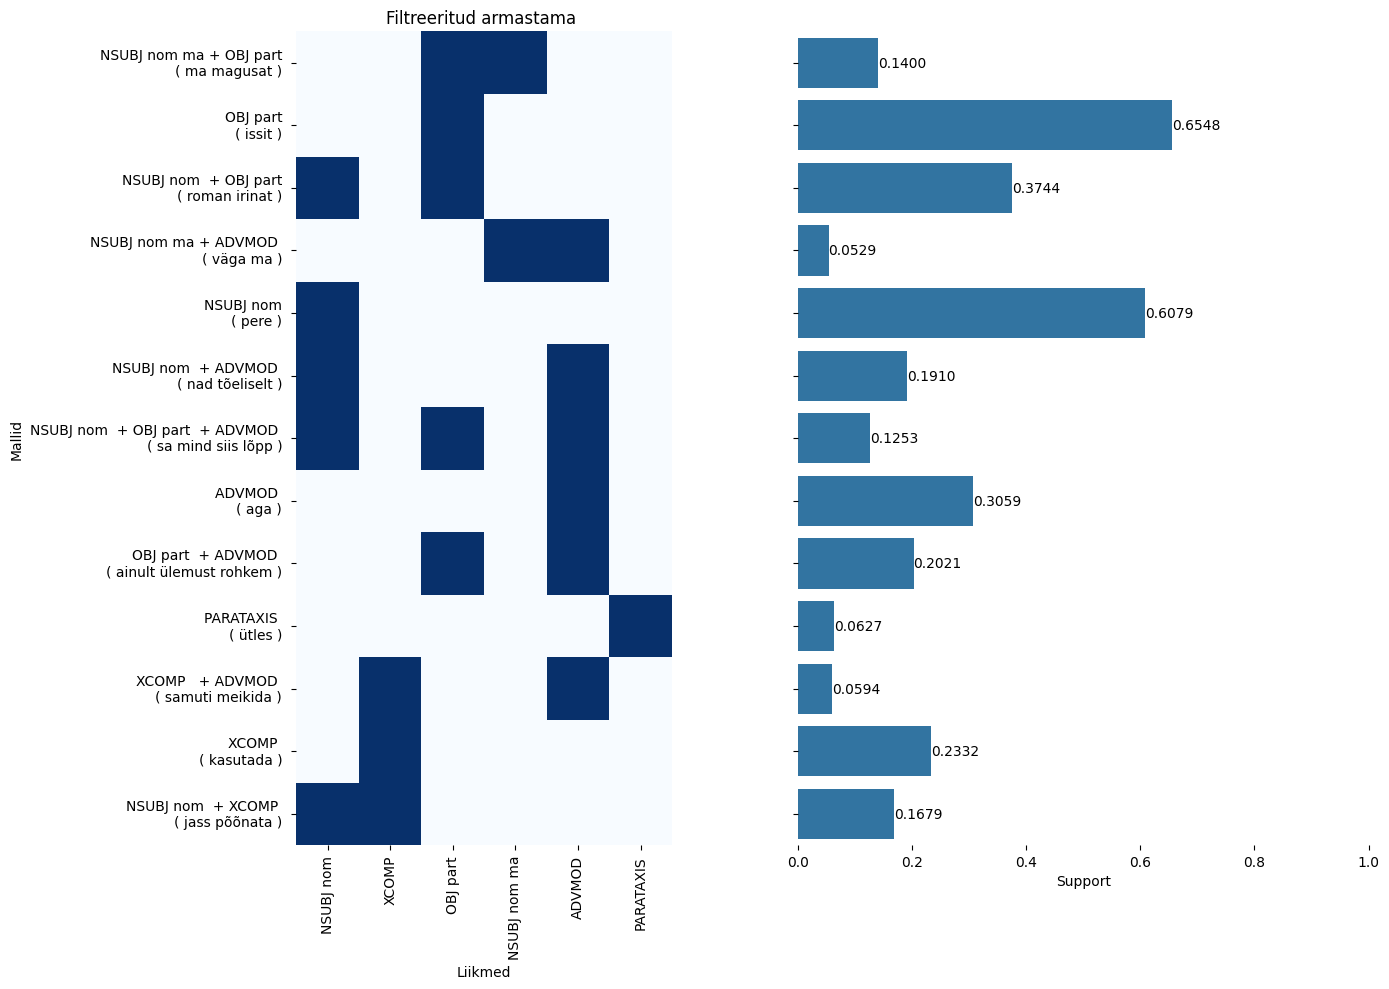

CPU times: user 13 s, sys: 3.38 s, total: 16.3 s
Wall time: 26.3 s


In [3]:
%%time
result = v30.make_all(verb='armastama', verb_compound='', examples=True)


## hüppama alla



************************************************ hüppama  alla ************************************************
Ridu analüüsimiseks: 535
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
2,0.571963,"((NSUBJ, nom, ))",inimesed,False,,1
5,0.459813,"((OBL, el, ))",aknast,False,,1
3,0.366355,"((OBL, abl, ))",kaljult,False,,1
16,0.265421,"((NSUBJ, nom, ), (OBL, el, ))",tipptegija aknast,False,,2
1,0.241121,"((ADVMOD, , ))",seejärel,False,,1
14,0.228037,"((NSUBJ, nom, ), (OBL, abl, ))",korruselt mees,False,,2
6,0.162617,"((OBL, gen, ))",maja,False,,1
4,0.158879,"((OBL, ad, ))",ajal,True,(row 15) delta: abs(0.1308 - 0.1589) < 0.03 %: (0.1589-0.1308)/0.1308*100<50,1
15,0.130841,"((OBL, ad, ), (NSUBJ, nom, ))",pühapäeval mees,False,,2
7,0.128972,"((OBL, in, ))",narvas,False,,1


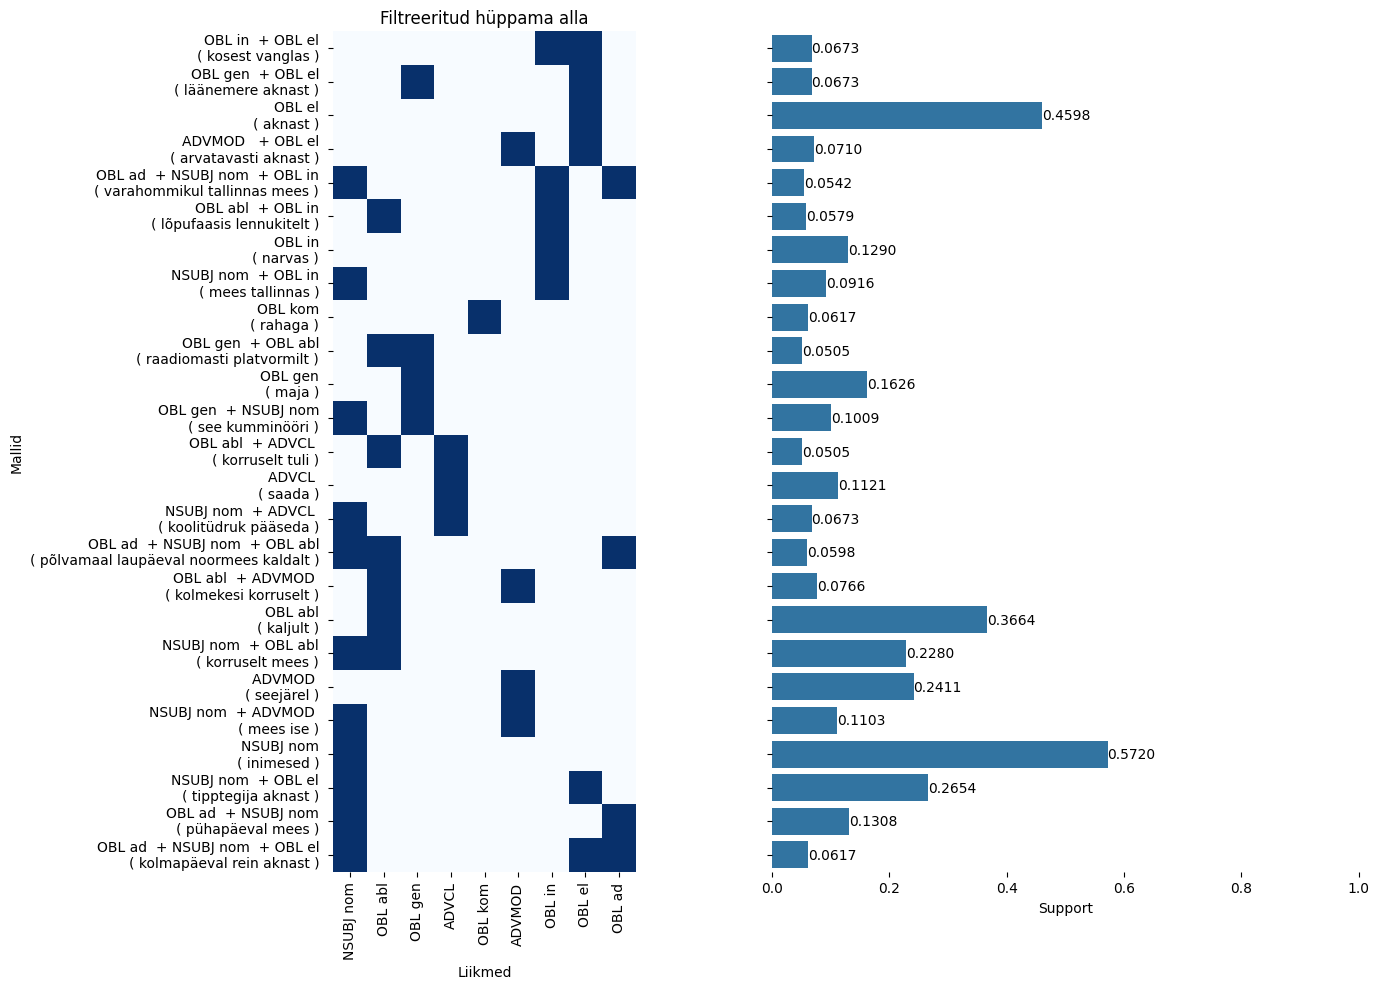

CPU times: user 13 s, sys: 2.82 s, total: 15.9 s
Wall time: 25.7 s


In [4]:
%%time

result = v30.make_all(verb='hüppama', verb_compound='alla', examples=True)

## sadama

************************************************ sadama   ************************************************
Ridu analüüsimiseks: 5819
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
0,0.445781,"((ADVMOD, , ))",järsku sinna,False,,1
4,0.252277,"((NSUBJ, part, vihma))",vihma,False,,1
5,0.208971,"((OBL, ad, ))",esietendusel,False,,1
2,0.186286,"((NSUBJ, part, ))",poisse,False,,1
9,0.174429,"((OBL, in, ))",septembris,False,,1
3,0.168758,"((NSUBJ, part, lund))",lund,False,,1
1,0.138512,"((NSUBJ, nom, ))",lumi,False,,1
14,0.102423,"((NSUBJ, part, vihma), (ADVMOD, , ))",mistõttu vihma,False,,2
8,0.097783,"((OBL, gen, ))",keila,False,,1
15,0.083004,"((OBL, ad, ), (ADVMOD, , ))",hommikul veel,False,,2


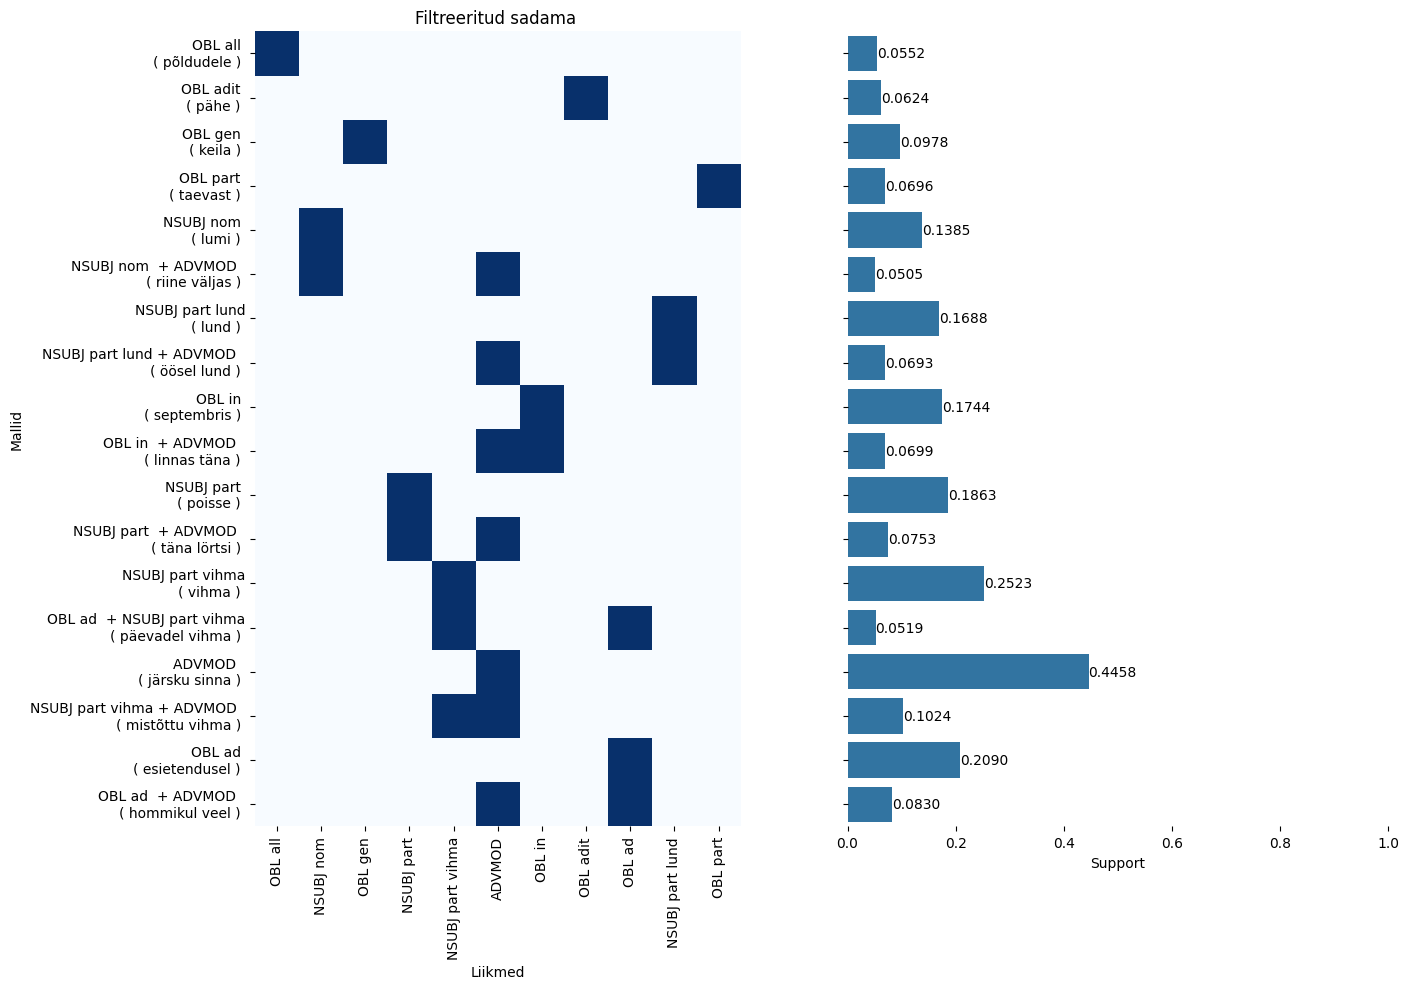

In [5]:
result = v30.make_all(verb='sadama', verb_compound='', examples=True)

## venitama

************************************************ venitama   ************************************************
Ridu analüüsimiseks: 1927
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
2,0.695381,"((NSUBJ, nom, ))",tõrge ta,False,,1
1,0.338869,"((ADVMOD, , ))",pikalt,False,,1
5,0.316554,"((OBJ, part, ))",jalga,False,,1
9,0.240789,"((OBL, kom, ))",tegemisega,False,,1
12,0.230929,"((NSUBJ, nom, ), (ADVMOD, , ))",spordiselts seetõttu,False,,2
16,0.185262,"((NSUBJ, nom, ), (OBJ, part, ))",rooba reielihast,False,,2
19,0.183186,"((OBL, kom, ), (NSUBJ, nom, ))",ametnikud võtmisega,False,,2
3,0.142190,"((OBJ, gen, ))",põlve,False,,1
0,0.125065,"((ADVCL, , ))",lüües,False,,1
13,0.101713,"((OBJ, part, ), (ADVMOD, , ))",vist mingit,False,,2


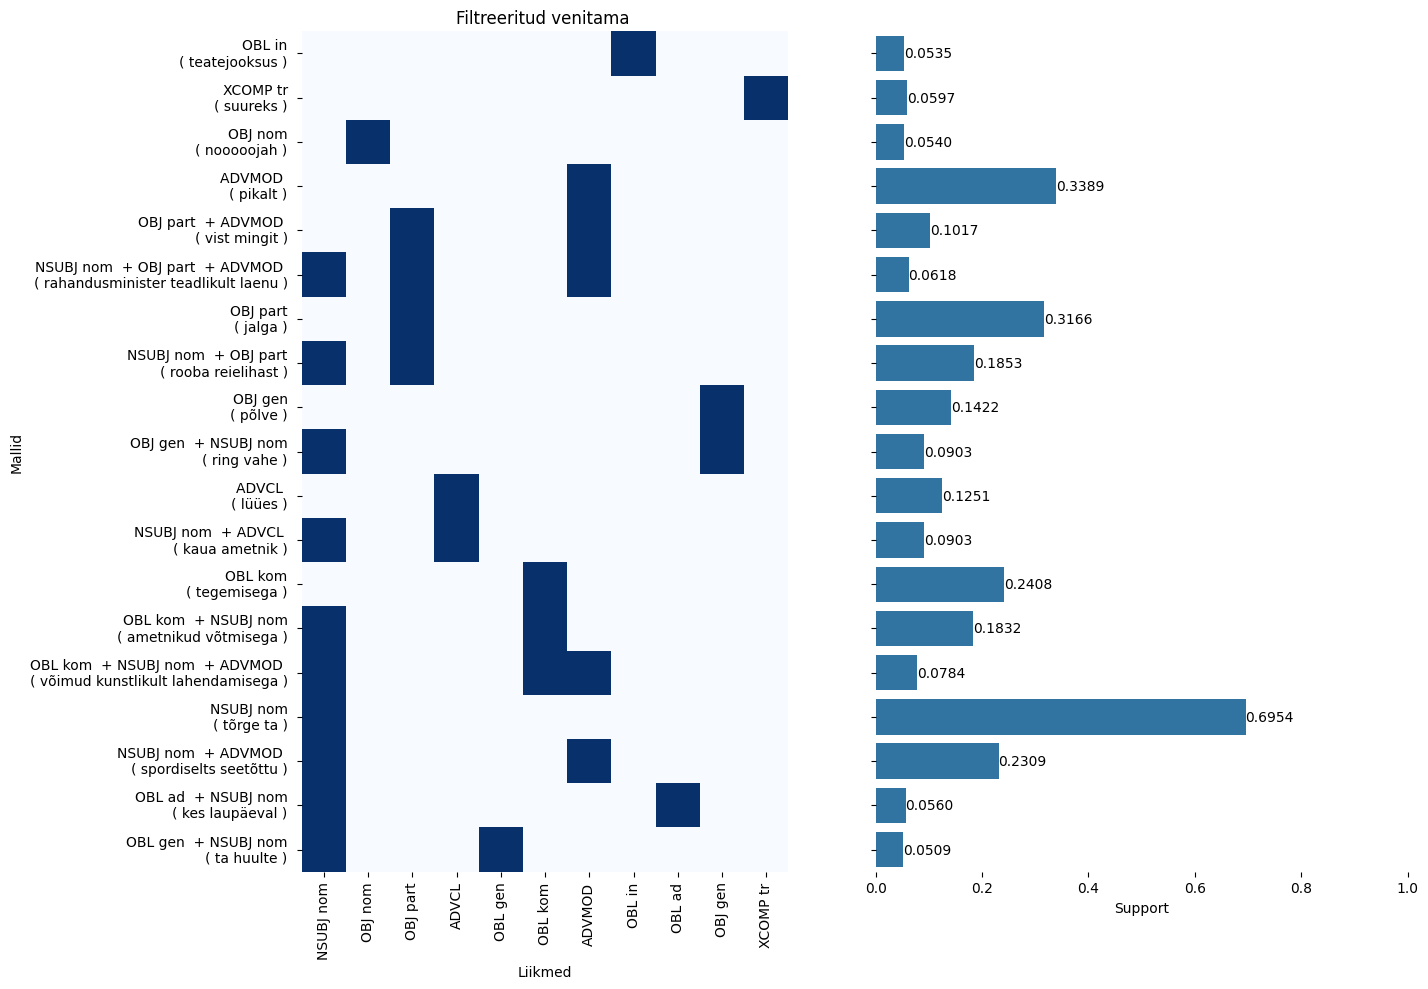

CPU times: user 13 s, sys: 2.94 s, total: 15.9 s
Wall time: 25.3 s


In [6]:
%%time
result = v30.make_all(verb='venitama', verb_compound='', examples=True)
